In [120]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
from matplotlib.ticker import FuncFormatter
plt.style.use('bsestyle_dark')
%matplotlib inline

In [121]:
def read(filename):
    df = pd.read_csv(filename, sep=';',decimal=',')
    df.rename(columns= lambda x: x.lower(),inplace=True)
    df.rename(columns= lambda x: x.replace('_',''),inplace=True)
    return df

def tag_ar(x):
    if  x < 0.2:
        return '0.0-0.2'
    elif 0.2 <= x <0.4:
        return '0.2-0.4'
    elif 0.4 <= x <0.6:
        return '0.4-0.6'
    elif 0.6 <= x < 0.8:
        return '0.6-0.8'
    else:
        return '0.8-1.0'

In [122]:
# read data
df_daily_ar = read('daily_AR_long.csv')
df_views = read('views_long.csv')
df_size_score = read('size_score.csv')

In [123]:
# weighted ar calculation
df_daily_ar.productcategory = df_daily_ar.productcategory.astype('category')
df_daily_ar = df_daily_ar.merge(df_size_score,on=['productcategory','size'])
df_daily_ar['weighted_ar'] = df_daily_ar['score'] * df_daily_ar.isavailable
group_list = ['productcategory','dimstyleoptionid','dimdate']
df_weigthedar_byso = df_daily_ar.groupby(group_list, as_index=False)[['weighted_ar', 'score']].sum()
df_weigthedar_byso['weighted_ar'] = df_weigthedar_byso['weighted_ar'] / df_weigthedar_byso['score']
df_weigthedar_byso = df_weigthedar_byso[df_weigthedar_byso.weighted_ar!=0]

In [124]:
df_gis = read('gis_long.csv')
df_pdp = read('pdp_long.csv')


In [125]:
df = df_weigthedar_byso.merge(df_gis,on=['dimdate','dimstyleoptionid'],how='left')
df = df.merge(df_pdp,on=['dimdate','dimstyleoptionid'],how='left')
df[df.dimstyleoptionid==58894]

,productcategory,dimstyleoptionid,dimdate,weighted_ar,score,gisod,pdp,plp
712222,T-SHIRTS & TOPS,58894,2017-07-01,1.000000,0.998251,2.0,23.0,432.0
712223,T-SHIRTS & TOPS,58894,2017-07-02,1.000000,0.998251,1.0,18.0,418.0
712224,T-SHIRTS & TOPS,58894,2017-07-03,1.000000,0.998251,4.0,15.0,339.0
712225,T-SHIRTS & TOPS,58894,2017-07-04,1.000000,0.998251,0.0,9.0,340.0
712226,T-SHIRTS & TOPS,58894,2017-07-05,1.000000,0.998251,1.0,18.0,237.0
712227,T-SHIRTS & TOPS,58894,2017-07-06,1.000000,0.998251,2.0,9.0,214.0
712228,T-SHIRTS & TOPS,58894,2017-07-07,1.000000,0.998251,1.0,2.0,218.0
712229,T-SHIRTS & TOPS,58894,2017-07-08,1.000000,0.998251,2.0,14.0,200.0
712230,T-SHIRTS & TOPS,58894,2017-07-09,1.000000,0.998251,1.0,11.0,300.0
712231,T-SHIRTS & TOPS,58894,2017-07-10,1.000000,0.998251,0.0,14.0,354.0


In [126]:
df.fillna(value=0, inplace=True)
df.weighted_ar = df.weighted_ar.apply(tag_ar)
df = df.groupby(['productcategory','weighted_ar']).agg({'pdp':'sum','plp':'sum','gisod':'sum'})
df['plp_cvr'] = df.gisod / df.plp * 1000
df['pdp_cvr'] = df.gisod / df.pdp * 1000
df['pdp_plp'] = df.pdp / df.plp
df.sort_index(axis=0,ascending=False, inplace=True)

In [127]:
df

gisod          plp        pdp   plp_cvr  \
productcategory weighted_ar                                               
T-SHIRTS & TOPS 0.8-1.0      307096.0  173067461.0  7095704.0  1.774429   
                0.6-0.8       42581.0   22326120.0  1105465.0  1.907228   
                0.4-0.6       38687.0   22777614.0  1124189.0  1.698466   
                0.2-0.4       16729.0   12168295.0   607659.0  1.374802   
                0.0-0.2       10979.0   10788212.0   519078.0  1.017685   
OUTERWEAR       0.8-1.0      146932.0  116053470.0  7334477.0  1.266072   
                0.6-0.8       15034.0   11563311.0   865367.0  1.300147   
                0.4-0.6       14519.0   12714486.0   967934.0  1.141926   
                0.2-0.4        4287.0    4967344.0   372349.0  0.863037   
                0.0-0.2        3444.0    4990996.0   372500.0  0.690043   
KNIT            0.8-1.0      136508.0   78601725.0  4077809.0  1.736705   
                0.6-0.8       16482.0    8930706.0   518858.0  1.845543   
                0.4-0.6       15842.0   11352323.0   626522.0  1.395485   
                0.2-0.4        8644.0    7496220.0   419888.0  1.153115   
                0.0-0.2        4763.0    5477262.0   290223.0  0.869595   
JEANS           0.8-1.0      285284.0   65404411.0  4578778.0  4.361846   
                0.6-0.8       44246.0   13194799.0   876375.0  3.353291   
                0.4-0.6       30043.0   11909075.0   826917.0  2.522698   
                0.2-0.4       10409.0    7580246.0   502745.0  1.373174   
                0.0-0.2        3391.0    3593074.0   282463.0  0.943760   
DRESSES         0.8-1.0      117715.0   93430040.0  4113996.0  1.259927   
                0.6-0.8       22399.0   16573595.0   836197.0  1.351487   
                0.4-0.6       25277.0   20889665.0  1174731.0  1.210024   
                0.2-0.4        8897.0    8564070.0   472676.0  1.038875   
                0.0-0.2        5883.0    7234106.0   398317.0  0.813231   

                               pdp_cvr   pdp_plp  
productcategory weighted_ar                       
T-SHIRTS & TOPS 0.8-1.0      43.279145  0.041000  
                0.6-0.8      38.518632  0.049514  
                0.4-0.6      34.413253  0.049355  
                0.2-0.4      27.530243  0.049938  
                0.0-0.2      21.150964  0.048115  
OUTERWEAR       0.8-1.0      20.033058  0.063199  
                0.6-0.8      17.372976  0.074837  
                0.4-0.6      14.999990  0.076128  
                0.2-0.4      11.513392  0.074959  
                0.0-0.2       9.245638  0.074634  
KNIT            0.8-1.0      33.475820  0.051879  
                0.6-0.8      31.765917  0.058098  
                0.4-0.6      25.285624  0.055189  
                0.2-0.4      20.586442  0.056013  
                0.0-0.2      16.411518  0.052987  
JEANS           0.8-1.0      62.305707  0.070007  
                0.6-0.8      50.487520  0.066418  
                0.4-0.6      36.331337  0.069436  
                0.2-0.4      20.704333  0.066323  
                0.0-0.2      12.005112  0.078613  
DRESSES         0.8-1.0      28.613300  0.044033  
                0.6-0.8      26.786750  0.050454  
                0.4-0.6      21.517267  0.056235  
                0.2-0.4      18.822618  0.055193  
                0.0-0.2      14.769643  0.055061

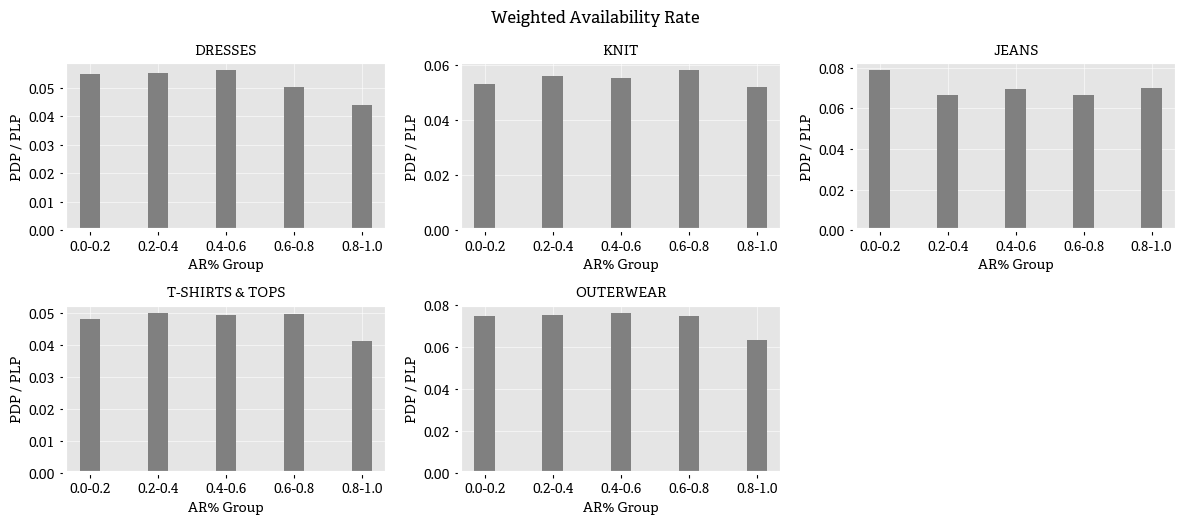

In [138]:
kpi = 'pdp_plp'

fig = plt.figure(figsize=(12,5),dpi=100)
catlist = ['DRESSES','KNIT','JEANS','T-SHIRTS & TOPS','OUTERWEAR']
for i,cat in enumerate(catlist,1):
    ax = fig.add_subplot(2,3,i)
    ax.set_title(cat,fontsize=10)
    ax.bar(df.loc[cat].index, df.loc[cat][kpi],0.3,color='grey')
    ax.set_ylabel("PDP / PLP")
    ax.set_xlabel('AR% Group')
    plt.tight_layout()
plt.tight_layout()
fig.suptitle('Weighted Availability Rate',y=1.04)
fig.show()
fig.savefig(kpi,dpi=200)

In [140]:
df_new = read('full_60days.csv')
df_new.head()

,productcategory,dimstyleoptionid,dimdateid,weightedar,gisod,nis,pdp,plp
0,T-SHIRTS & TOPS,225678,4138,1.0,2.0,0.0,15.0,154.0
1,T-SHIRTS & TOPS,225678,4139,1.0,6.0,6.0,13.0,249.0
2,T-SHIRTS & TOPS,225678,4140,1.0,10.0,5.0,23.0,454.0
3,T-SHIRTS & TOPS,225678,4141,1.0,6.0,3.0,74.0,1667.0
4,T-SHIRTS & TOPS,225678,4142,1.0,6.0,5.0,63.0,1386.0


In [150]:
def process(df):
    df.fillna(value=0, inplace=True)
    df.weightedar = df.weightedar.apply(tag_ar)
    df = df.groupby(['productcategory','weightedar']).agg({'pdp':'sum','plp':'sum','gisod':'sum'})
    df['plp_cvr'] = df.gisod / df.plp * 1000
    df['pdp_cvr'] = df.gisod / df.pdp * 1000
    df['pdp_plp'] = df.pdp / df.plp
    df.sort_index(axis=0,ascending=False, inplace=True)
    return df
df_test = process(df_new)

In [151]:
df_test

gisod         plp        pdp   plp_cvr  \
productcategory weightedar                                              
T-SHIRTS & TOPS 0.8-1.0     154808.0  94006454.0  3758913.0  1.646781   
                0.6-0.8      19562.0   8146656.0   520038.0  2.401231   
                0.4-0.6      16369.0   7053168.0   490010.0  2.320801   
                0.2-0.4       6396.0   3000293.0   228749.0  2.131792   
                0.0-0.2       3912.0   2260017.0   181358.0  1.730960   
OUTERWEAR       0.8-1.0      69942.0  64503278.0  3769569.0  1.084317   
                0.6-0.8       4147.0   2946476.0   276606.0  1.407444   
                0.4-0.6       3814.0   3075320.0   285839.0  1.240196   
                0.2-0.4       1081.0    991654.0    97259.0  1.090098   
                0.0-0.2        605.0    650344.0    70013.0  0.930277   
KNIT            0.8-1.0      75445.0  49436527.0  2354466.0  1.526098   
                0.6-0.8       7236.0   3836077.0   237992.0  1.886302   
                0.4-0.6       7392.0   4695928.0   297951.0  1.574130   
                0.2-0.4       3468.0   2525442.0   184978.0  1.373225   
                0.0-0.2       1215.0   1023780.0    66341.0  1.186778   
JEANS           0.8-1.0      64527.0  23890126.0  1256164.0  2.700990   
                0.6-0.8      11467.0   3300721.0   235702.0  3.474089   
                0.4-0.6       5979.0   1731714.0   155086.0  3.452649   
                0.2-0.4       1330.0    524552.0    56508.0  2.535497   
                0.0-0.2        345.0    154374.0    20915.0  2.234832   
DRESSES         0.8-1.0      70381.0  53113032.0  2429513.0  1.325117   
                0.6-0.8      10289.0   6161909.0   395521.0  1.669775   
                0.4-0.6       9989.0   6454654.0   491144.0  1.547566   
                0.2-0.4       3465.0   2363675.0   187961.0  1.465938   
                0.0-0.2       1830.0   1511147.0   130190.0  1.211001   

                              pdp_cvr   pdp_plp  
productcategory weightedar                       
T-SHIRTS & TOPS 0.8-1.0     41.184247  0.039986  
                0.6-0.8     37.616482  0.063835  
                0.4-0.6     33.405441  0.069474  
                0.2-0.4     27.960778  0.076242  
                0.0-0.2     21.570595  0.080246  
OUTERWEAR       0.8-1.0     18.554376  0.058440  
                0.6-0.8     14.992444  0.093877  
                0.4-0.6     13.343176  0.092946  
                0.2-0.4     11.114653  0.098078  
                0.0-0.2      8.641252  0.107655  
KNIT            0.8-1.0     32.043359  0.047626  
                0.6-0.8     30.404383  0.062040  
                0.4-0.6     24.809449  0.063449  
                0.2-0.4     18.748175  0.073246  
                0.0-0.2     18.314466  0.064800  
JEANS           0.8-1.0     51.368293  0.052581  
                0.6-0.8     48.650415  0.071409  
                0.4-0.6     38.552803  0.089556  
                0.2-0.4     23.536490  0.107726  
                0.0-0.2     16.495338  0.135483  
DRESSES         0.8-1.0     28.969180  0.045742  
                0.6-0.8     26.013789  0.064188  
                0.4-0.6     20.338231  0.076091  
                0.2-0.4     18.434675  0.079521  
                0.0-0.2     14.056379  0.086153

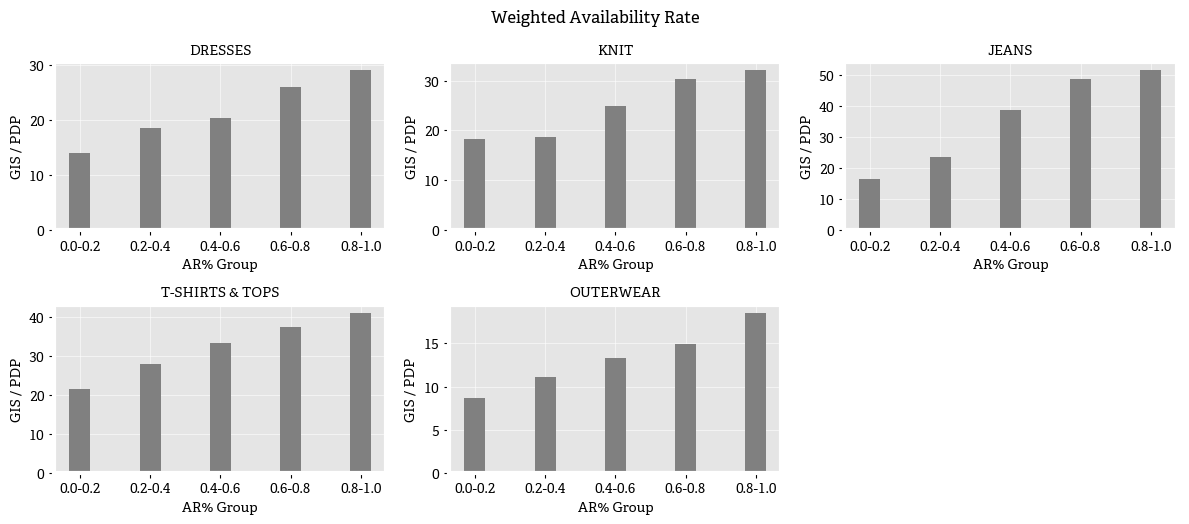

In [155]:
kpi = 'pdp_cvr'

fig = plt.figure(figsize=(12,5),dpi=100)
catlist = ['DRESSES','KNIT','JEANS','T-SHIRTS & TOPS','OUTERWEAR']
for i,cat in enumerate(catlist,1):
    ax = fig.add_subplot(2,3,i)
    ax.set_title(cat,fontsize=10)
    ax.bar(df_test.loc[cat].index, df_test.loc[cat][kpi],0.3,color='grey')
    ax.set_ylabel("GIS / PDP")
    ax.set_xlabel('AR% Group')
    plt.tight_layout()
plt.tight_layout()
fig.suptitle('Weighted Availability Rate',y=1.04)
fig.show()
fig.savefig(kpi,dpi=200)

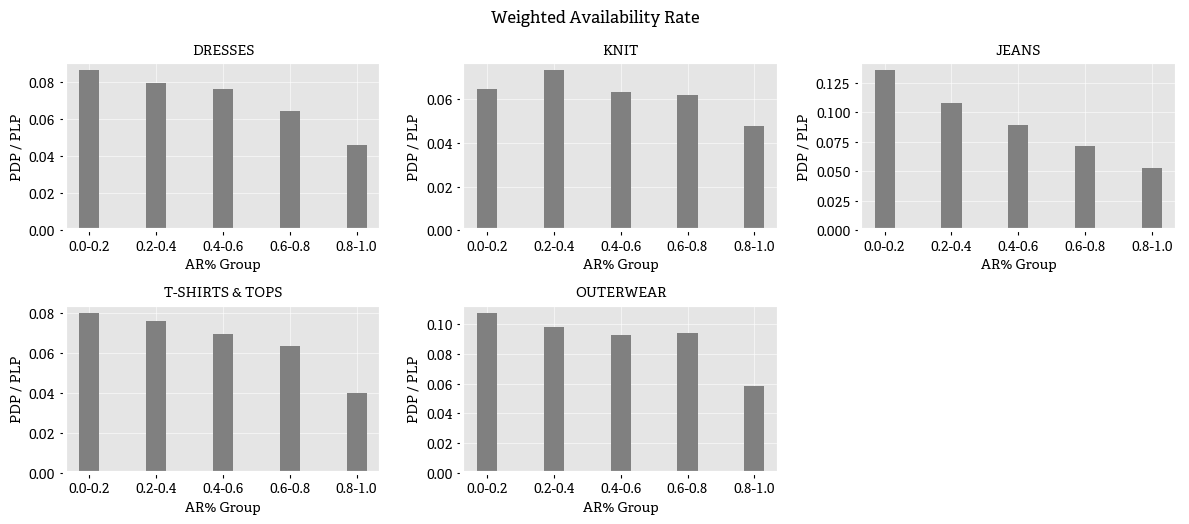

In [154]:
kpi = 'pdp_plp'

fig = plt.figure(figsize=(12,5),dpi=100)
catlist = ['DRESSES','KNIT','JEANS','T-SHIRTS & TOPS','OUTERWEAR']
for i,cat in enumerate(catlist,1):
    ax = fig.add_subplot(2,3,i)
    ax.set_title(cat,fontsize=10)
    ax.bar(df_test.loc[cat].index, df_test.loc[cat][kpi],0.3,color='grey')
    ax.set_ylabel("PDP / PLP")
    ax.set_xlabel('AR% Group')
    plt.tight_layout()
plt.tight_layout()
fig.suptitle('Weighted Availability Rate',y=1.04)
fig.show()
fig.savefig(kpi,dpi=200)